<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_6_Machine_Learning_Laboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective:**

To gain an understanding of feedforward neural networks, backpropagation, and their implementation using both NumPy and PyTorch.

# **Outline:**

1.   **Data Handling and Preprocessing**
* Load and preprocess the MNIST dataset for use in neural network training.
* Visualize sample images from the dataset to understand its structure.
* Perform one-hot encoding of target labels for multi-class classification.
* Split the dataset into training, validation, and test sets for model evaluation and generalization.
2.   **Neural Network Implementation from Scratch (NumPy)**
* Design a simple neural network architecture with a single hidden layer using NumPy.
* Implement functionalities: initialization, forward pass, cost function computation, backward pass, training, and prediction.
3. **Model Evaluation and Comparison**
* Plot training and validation losses.
* Compute and interpret classification metrics on the test set to assess the model's performance.
* Compare the performance of the scratch-built NumPy model with scikit-learn's MLPClassifier.
4. **Introduction to PyTorch**
* Build the same neural network architecture using PyTorch's nn.Module.
* Design a data loader using PyTorch's DataLoader to efficiently handle batching and shuffling of data during training.
* Train the PyTorch model.
5. Save the trained PyTorch model.
6. Load the saved model and use it to make predictions.





**Feedforward Neural Network (from scratch)**

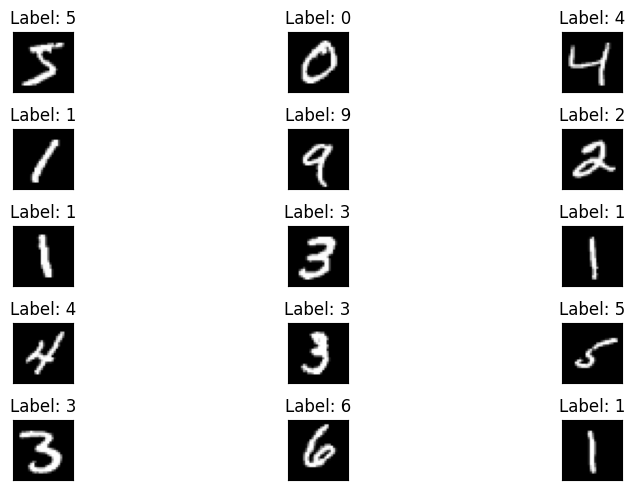

Original labels (first 5): [5 0 4 1 9]

One-hot encoded labels (first 5):
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# Step 1: Load and preprocess the MNIST dataset

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.metrics import classification_report, confusion_matrix

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize some examples
plt.figure(figsize=(10,5))
for i in range(15):
    plt.subplot(5, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.title(f"Label: {y_train[i]}")  # Add title with label information
plt.tight_layout()  # Adjust subplot spacing for better layout
plt.show()

# Preprocess data: normalize pixel values and one-hot encode labels
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Display some original labels
print("Original labels (first 5):", y_train[:5])

def one_hot_encode(y, num_classes):
    encoded = np.zeros((len(y), num_classes))
    encoded[np.arange(len(y)), y] = 1
    return encoded

y_train = one_hot_encode(y_train, 10)
y_test = one_hot_encode(y_test, 10)

# Display some one-hot encoded labels
print("\nOne-hot encoded labels (first 5):\n", y_train[:5])

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

60000
10000
60000
10000


In [ ]:
# Step 2: Split dataset into training, validation and test sets

from sklearn.model_selection import train_test_split

# Split the data into training + temp and test
X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Split the temp data into val and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

In [ ]:
print("Dataset sizes:")

print("Training")
print(len(X_train))
print(len(y_train))

print("\nValidation")
print(len(X_val))
print(len(y_val))

print("\nTesting")
print(len(X_test))
print(len(y_test))

Dataset sizes:
Training
30000
30000

Validation
18000
18000

Testing
12000
12000


In [ ]:
# Step 3: Design a simple neural network from scratch (just using NumPy)

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)  # Activation function (tanh)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cost_function(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred)) / m
        return loss

    def backward(self, X, y_true, y_pred):
        m = y_true.shape[0]

        delta2 = (y_pred - y_true) / m
        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)

        delta1 = np.dot(delta2, self.W2.T) * (1 - np.power(self.a1, 2))
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)

        return dW1, db1, dW2, db2

    def train(self, X, y, epochs, learning_rate):
        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.cost_function(y, y_pred)
            train_losses.append(loss)

            dW1, db1, dW2, db2 = self.backward(X, y, y_pred)

            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2

            # Validation loss
            val_pred = self.forward(X_val)
            val_loss = self.cost_function(y_val, val_pred)
            val_losses.append(val_loss)

            if epoch % 10 == 0:
              print(f"Epoch {epoch}, Loss: {loss}, Val_loss: {val_loss}")

        return train_losses, val_losses

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

In [ ]:
# Initialize and train the model
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.5
epochs = 100

model = SimpleNeuralNetwork(input_size, hidden_size, output_size)
train_losses, val_losses = model.train(X_train, y_train, epochs, learning_rate)

Epoch 0, Loss: 2.3662443741798347, Val_loss: 1.939038045987406
Epoch 10, Loss: 0.7294627884534541, Val_loss: 0.7036455686699095
Epoch 20, Loss: 0.5214967449878595, Val_loss: 0.520979711079477
Epoch 30, Loss: 0.44336990227233686, Val_loss: 0.44821748291840235
Epoch 40, Loss: 0.4016039507163938, Val_loss: 0.408824582468891
Epoch 50, Loss: 0.3747354668700395, Val_loss: 0.3834802012071917
Epoch 60, Loss: 0.35545302105518944, Val_loss: 0.36538200826102485
Epoch 70, Loss: 0.3406038420926021, Val_loss: 0.3515506454208146
Epoch 80, Loss: 0.32858433241438223, Val_loss: 0.3404528136614002
Epoch 90, Loss: 0.31848965529760637, Val_loss: 0.3312136091192862


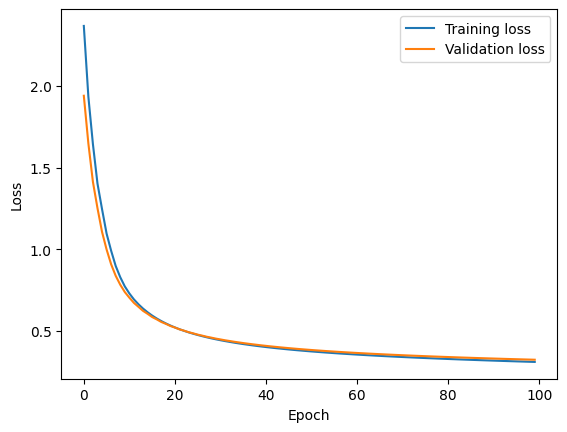

In [ ]:
# Step 4: Plot the training and validation losses

plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Step 5: Show classification metrics on the test set

y_pred = model.predict(X_test)
# Convert y_pred to one-hot encoded format
y_pred = one_hot_encode(y_pred, 10)

print(classification_report(y_test, y_pred))

# Calculate and print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Convert one-hot encoded labels back to multiclass format
y_test_multiclass = np.argmax(y_test, axis=1)
y_pred_multiclass = np.argmax(y_pred, axis=1)

# Now use the multiclass labels for confusion matrix
print(confusion_matrix(y_test_multiclass, y_pred_multiclass))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1188
           1       0.93      0.96      0.95      1282
           2       0.89      0.88      0.88      1159
           3       0.88      0.88      0.88      1220
           4       0.90      0.93      0.92      1134
           5       0.90      0.84      0.87      1116
           6       0.93      0.95      0.94      1255
           7       0.93      0.91      0.92      1275
           8       0.87      0.87      0.87      1146
           9       0.89      0.89      0.89      1225

   micro avg       0.91      0.91      0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000
 samples avg       0.91      0.91      0.91     12000

Overall Accuracy: 90.83%
[[1147    0    5    3    2   10    5    1   14    1]
 [   0 1232    7    9    1    4    3    3   20    3]
 [  13   12 1021   21   19    1   22   18   24    8]
 [ 

**Performance comparison with MLP Classifier**

In [ ]:
# Step 6: Compare with Scikit-learn's MLPClassifier

from sklearn.neural_network import MLPClassifier
learning_rate = 0.01

# Use the same hyperparameters as SimpleNeuralNetwork
mlp = MLPClassifier(
    hidden_layer_sizes=(hidden_size,),  # Single hidden layer with 'hidden_size' neurons
    activation='tanh',                   # Tanh activation function
    solver='sgd',                        # Stochastic Gradient Descent optimizer
    learning_rate_init=learning_rate,    # Same learning rate
    max_iter=epochs,                     # Same number of epochs
    random_state=42,                     # For reproducibility
    batch_size=X_train.shape[0]           # Batch gradient descent (entire dataset as one batch)
)

# Train the MLP Classifier
mlp.fit(X_train, y_train)  # Use one-hot encoded labels

# Make predictions
y_pred_sklearn = mlp.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_sklearn))

# Calculate and print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1188
           1       0.94      0.92      0.93      1282
           2       0.93      0.70      0.80      1159
           3       0.94      0.69      0.80      1220
           4       0.94      0.73      0.82      1134
           5       0.94      0.39      0.55      1116
           6       0.95      0.86      0.91      1255
           7       0.96      0.80      0.87      1275
           8       0.93      0.51      0.66      1146
           9       0.91      0.52      0.66      1225

   micro avg       0.94      0.70      0.81     12000
   macro avg       0.94      0.70      0.79     12000
weighted avg       0.94      0.70      0.79     12000
 samples avg       0.70      0.70      0.70     12000

Overall Accuracy: 90.83%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Using PyTorch**

In [ ]:
import torch # The core PyTorch module, providing tensor operations and neural network functionalities.
import torch.nn as nn # Contains classes for building neural networks, such as layers, activation functions, and loss functions.
import torch.optim as optim # Provides various optimization algorithms like SGD, Adam, etc., for training neural networks.
from torch.utils.data import DataLoader, TensorDataset
# DataLoader helps efficiently iterate over your data in batches during training, while TensorDataset combines your input features and labels into a dataset object.

# Step 7: Design a dataloader for the dataset using PyTorch DataLoader

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [ ]:
print("Dataset sizes:")
print(f"Training set: {len(train_dataset)}")
print(f"Validation set: {len(val_dataset)}")
print(f"Test set: {len(test_dataset)}")

Dataset sizes:
Training set: 30000
Validation set: 18000
Test set: 12000


In [ ]:
# Create dataloaders

batch_size_train = len(train_dataset)
batch_size_val = len(val_dataset)
batch_size_test = len(test_dataset)

train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size_val)
test_loader = DataLoader(test_dataset, batch_size=batch_size_test)

In [ ]:
# Build the same network architecture using PyTorch

class PyTorchNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PyTorchNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        return x

In [ ]:
# Initialize model, loss function and optimizer
learning_rate = 0.5
pytorch_model = PyTorchNeuralNetwork(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(pytorch_model.parameters(), lr=learning_rate)

In [ ]:
# Train the PyTorch model

train_losses_pytorch = []
val_losses_pytorch = []

for epoch in range(epochs):
    pytorch_model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = pytorch_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        # if batch_idx % 100 == 0:
        #     print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}]\tLoss: {loss.item():.6f}')

    # Validation loss
    pytorch_model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = pytorch_model(data)
            val_loss += criterion(output, target).item()

    val_loss /= len(val_loader)
    train_losses_pytorch.append(loss.item())
    val_losses_pytorch.append(val_loss)

    if epoch % 10 == 0:
              print(f"Epoch {epoch}, Loss: {loss}, Val_loss: {val_loss}")

    # print(f'Epoch {epoch}, Loss: {loss.item()}, Val_loss: {val_loss}')

Epoch 0, Loss: 2.308333396911621, Val_loss: 2.1283061504364014
Epoch 10, Loss: 0.9275829195976257, Val_loss: 0.8764851093292236
Epoch 20, Loss: 0.5940055847167969, Val_loss: 0.588275671005249
Epoch 30, Loss: 0.4829132854938507, Val_loss: 0.4855360686779022
Epoch 40, Loss: 0.42710110545158386, Val_loss: 0.43263307213783264
Epoch 50, Loss: 0.3931747376918793, Val_loss: 0.4002583622932434
Epoch 60, Loss: 0.3699681758880615, Val_loss: 0.3781597316265106
Epoch 70, Loss: 0.35275912284851074, Val_loss: 0.36188873648643494
Epoch 80, Loss: 0.3392404317855835, Val_loss: 0.34923383593559265
Epoch 90, Loss: 0.3281582295894623, Val_loss: 0.33897659182548523


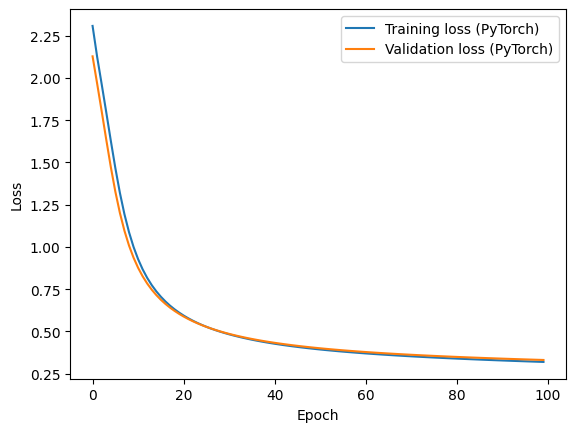

In [ ]:
# Step 8: Plot training and validation losses for PyTorch model

plt.plot(train_losses_pytorch, label='Training loss (PyTorch)')
plt.plot(val_losses_pytorch, label='Validation loss (PyTorch)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 9: Save the trained PyTorch model

torch.save(pytorch_model.state_dict(), 'mnist_model.pth')

In [ ]:
# Step 10: Load the saved model and perform prediction

loaded_model = PyTorchNeuralNetwork(input_size, hidden_size, output_size)
loaded_model.load_state_dict(torch.load('mnist_model.pth'))
loaded_model.eval()

# Prediction and metrics
with torch.no_grad():
    correct = 0
    total = 0
    y_pred_pytorch = []
    for data, target in test_loader:
        output = loaded_model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == torch.argmax(target, dim=1)).sum().item()
        y_pred_pytorch.extend(predicted.cpu().numpy())

print(f'\nAccuracy of the network on test images: {100 * correct // total} %')

# Convert y_pred_pytorch to one-hot encoded format
y_pred_pytorch_encoded = one_hot_encode(y_pred_pytorch, 10)

# Now use y_pred_pytorch_encoded for classification report
print(classification_report(y_test, y_pred_pytorch_encoded))

<ipython-input-18-ff095684fa9e>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('mnist_model.pth'))



Accuracy of the network on test images: 90 %
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1188
           1       0.93      0.96      0.94      1282
           2       0.89      0.88      0.88      1159
           3       0.88      0.87      0.88      1220
           4       0.90      0.93      0.91      1134
           5       0.89      0.83      0.86      1116
           6       0.92      0.96      0.94      1255
           7       0.93      0.90      0.91      1275
           8       0.87      0.87      0.87      1146
           9       0.89      0.88      0.88      1225

   micro avg       0.91      0.91      0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000
 samples avg       0.91      0.91      0.91     12000



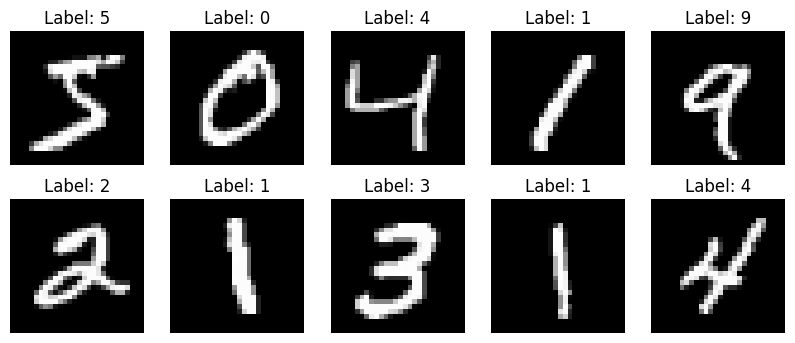

Mean: 0.1307
Standard Deviation: 0.3081
Mean: -0.0001
Standard Deviation: 1.0000
60000
10000
Dataset sizes:
Training set: 48000
Validation set: 12000
Test set: 10000


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

# Visualize original data
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    img, label = train_dataset[i]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.show()

# Convert PIL Images to tensors
to_tensor = transforms.ToTensor()
data = torch.stack([to_tensor(img) for img, _ in train_dataset]) # Stack all images into a single tensor

# Calculate the mean and standard deviation

mean = data.mean().item()
std = data.std().item()

print(f'Mean: {mean:.4f}')
print(f'Standard Deviation: {std:.4f}')

# Preprocessing transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize using MNIST dataset's mean and std
])

# Apply transformations to the datasets
train_dataset.transform = transform
test_dataset.transform = transform

data = torch.stack([img for img, _ in train_dataset])  # Stack all images into a single tensor

# Calculate the mean and standard deviation

mean = data.mean().item()
std = data.std().item()

print(f'Mean: {mean:.4f}')
print(f'Standard Deviation: {std:.4f}')

print(len(train_dataset))
print(len(test_dataset))

from torch.utils.data import random_split
# Split the train_dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))  # 80% for training
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

print("Dataset sizes:")
print(f"Training set: {len(train_dataset)}")
print(f"Validation set: {len(val_dataset)}")
print(f"Test set: {len(test_dataset)}")

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

**Assignment 6**: Predicting Bike Sharing Demand with Neural Networks

# 1. Load and preprocess the [Bike Sharing dataset](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset) **[1 Marks]**

*   Check for missing and duplicate values
*   Remove it (If found)

# 2. Data Pre-processing **[1 Marks]**

*   Perform one-hot encoding of the categorical features when necessary (not necessary if there is a natural ordering between categories)
*   Perform feature scaling

# 3. Data Splitting **[1  Marks]**

*   Divide the data into training, validation and test sets (70%-15%-15%).

# 4. Model Design: Design a neural network having N hidden layers **[7  Marks]**  

*   The number of units in each hidden layer as 128, 64, 32, and so on
*   Activation function in each hidden layer: ReLU
*   What activation function should you choose for the output layer for this prediction problem?

# 5. Cost function: Define a cost function suitable for this problem **[3  Marks]**

*   Use the SGD optimizer to optimize this cost function using backpropagation.

# 6. Perform cross-validation to find the best value of N using grid search. **[2  Marks]**

# 7. Loss Plots: **[1 Marks]**

*  Plot the training and validation losses for each value of N (on the same
graph).

# 8. What is the *best value of the number of hidden layers (N)* for this problem? Justify your answer. **[2  Marks]**

# 9. For the model trained with the best value of N that you reported in the previous question, *report the MSE on the test set*.  **[1  Marks]**

# 10. Show a *scatter plot of the predictions against the true values* for the predictions for the best model that you obtained. **[1  Marks]**
